In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [33]:
colunas = ['Q092', 'C006', 'C00703', 'D00901', 'C009','C011','M01401','M01501', 'M01601', 'M01901', 
           'N001', 'N00101', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           'P034','P050','V00201','V00203','H001', 'V02802', 'Q120', 'VDF002', 'P018', 'P02002', 
           'P02602', 'P04502', 'J007'] # Adicionei J007 - 

In [34]:
base = pd.read_csv('dados/pns2019.csv', delimiter=",", encoding='latin1', usecols=colunas)

In [35]:
print((base['Q092'] == 1).sum())
print((base['Q092'] == 2).sum())

8332
82514


In [36]:
base.shape

(293726, 35)

In [37]:
base.isnull().sum()

C006       14344
C00703     14344
C009       14344
C011       51282
D00901    115713
J007       14344
M01401    202880
M01501    202880
M01601    202880
M01901    202880
N001      202880
N00101    202880
N010      202880
N011      202880
N012      202880
N013      202880
N014      202880
N015      202880
N016      202880
N017      202880
N018      202880
P018      202880
P02002    202880
P02602    202880
P027      202880
P034      202880
P04502    202880
P050      202880
Q092      202880
Q120      202880
V00201    205195
V00203    205195
V02802    205867
H001      205195
VDF002     14516
dtype: int64

In [38]:
base.dropna(subset=['Q092'],inplace=True) # Deleta linhas em que a classe é nula
print(base.shape)
base = base.drop_duplicates() # Deleta linhas duplicadas

(90846, 35)


In [39]:

# D00901 = Grau de estuddo 01 creche 15 doutorado

# Q046013 = Praticar ativ física regular

# Q046014 = Não fumar

# Q046015 = Não beber em excesso

# VDF004 = Renda per capita

#C006 - SEXO

#C00703 - ANO DE NASCIMENTO

#C009 - COR 

#C011 - ESTADO CIVIL

#M01401 - Com quantos familiares ou parentes ___ pode contar em momentos bons ou ruins

#M01501 - Com quantos amigos próximos ___ pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes

#M01601 - Nos últimos doze meses, com que frequência o(a) Sr(a) se reuniu com outras pessoas para prática de atividades esportivas, exercícios físicos, recreativos ou artísticos

#M01901 - Nos últimos doze meses, com que frequência o(a) Sr(a) compareceu a atividades coletivas da sua religião ou de outra religião sem contar com situações como casamento, batizado, ou enterro)

#N001 - Em geral, como o(a) Sr(a) avalia a sua saúde

# N00101 -  Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como você avalia o seu estado de saúde? 

#N010 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume?

#N011 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia? 

#N012 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas? 

#N014 - Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que de costume?

#N016 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?

#N017 - Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?

#N018 - Nas duas últimas semanas, com que frequência o(a) Sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor estar morto?

#P027 - Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?

#P034 - Nos últimos três meses, o(a) Sr(a) praticou algum tipo de exercício físico ou esporte? 

#P050 - Atualmente, o(a) Sr(a) fuma algum produto do tabaco? 

#V00201 - Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?

#V00203 - Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?

#H001 - Quando foi a última vez que o(a) sr(a) consultou com um(a) médico(a)?

#V02802 - E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?

#V02702 -  Nos últimos doze meses, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?

#Q120 - Algum médico já lhe deu diagnóstico de câncer?

#VDF002 - Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)

#P018 - Em quantos dias da semana o(a) Sr(a) costuma comer frutas? 

#P02002 - Em quantos dias da semana o(a) Sr(a) costuma tomar refrigerante?

#P02602 - Em quantos dias da semana o(a) Sr(a) costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc? 

#P04502 - Em um dia, quantas horas do seu tempo livre (excluindo o trabalho), o(a) Sr(a) costuma usar computador, tablet ou celular para lazer, tais como: utilizar redes sociais, para ver notícias, vídeos, jogar etc? 




In [40]:
print((base['Q092'] == 1).sum())
print((base['Q092'] == 2).sum())

8331
82504


In [41]:
def mapear_cor(x):
    if x == 1:
        return 1 # Branco
    elif x == 2:
        return 2 # Preto + pardo
    elif  x == 4:
        return 2
    else:
        return 3 # Outros - Amarelo, indígena, ignorado (poucas instâncias)

# Aplicar a função de mapeamento à coluna
base['C009'] = base['C009'].apply(mapear_cor)

In [42]:
# Calcular o percentil 95 (por exemplo, para apagar salários no top 5%)
percentil_95 = base['VDF002'].quantile(0.95) # Valor decidido com base no gráfico da frequência de VDF002

base['VDF002'] = base['VDF002'].apply(lambda x: None if x > percentil_95 else x) 

base['VDF002'] = base['C00703'].apply(lambda x: None if x == 9999 else x) 

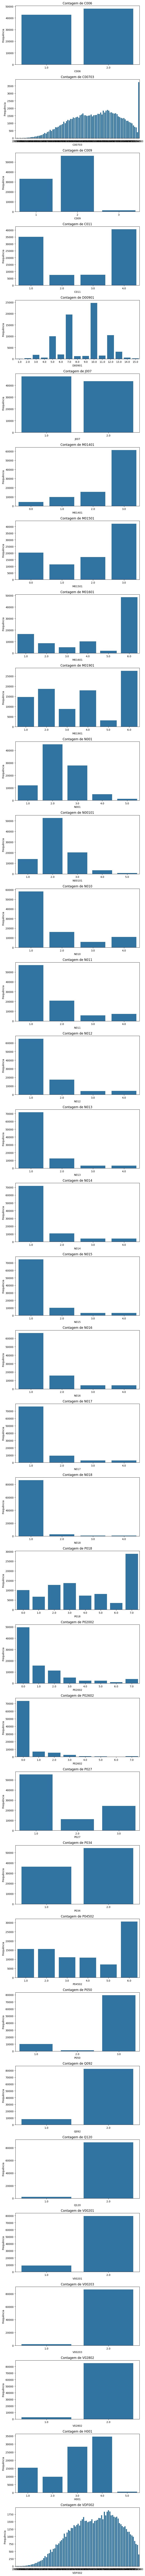

In [43]:
# Definindo o número de colunas
num_cols = len(base.columns)

# Definir o layout para os gráficos
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols*4))

# Iterar sobre cada coluna categórica e gerar um gráfico de barras
for i, col in enumerate(base.columns):
    sns.countplot(data=base, x=col, ax=axes[i])
    axes[i].set_title(f'Contagem de {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [44]:
col = base.pop('Q092')
base.insert(len(base.columns), 'Q092', col)

In [45]:
base['C00703'].unique()

array([1963., 2000., 1973., 1960., 1990., 1938., 9999., 1981., 1985.,
       1966., 1982., 1962., 1997., 1984., 1976., 1995., 1987., 1969.,
       1952., 1972., 1998., 1970., 1989., 1953., 1958., 1979., 1950.,
       1971., 1986., 1954., 1975., 1983., 1956., 1996., 1980., 1961.,
       1992., 1978., 1959., 1967., 1947., 1974., 1951., 1994., 1957.,
       1942., 1968., 1943., 1964., 1945., 1977., 2002., 1949., 1924.,
       1939., 1948., 1993., 1991., 1999., 1988., 1946., 1965., 2003.,
       1935., 2001., 1926., 1940., 1941., 1955., 1934., 1929., 1944.,
       2004., 1930., 1937., 1936., 1932., 1933., 1928., 1931., 1922.,
       1925., 1923., 1927., 1920., 1915., 1916., 1919., 1917., 1921.,
       1918.])

In [46]:
base.isnull().sum()

C006          0
C00703        0
C009          0
C011          0
D00901    13965
J007          0
M01401        0
M01501        0
M01601        0
M01901        0
N001          0
N00101        0
N010          0
N011          0
N012          0
N013          0
N014          0
N015          0
N016          0
N017          0
N018          0
P018          0
P02002        0
P02602        0
P027          0
P034          0
P04502        0
P050          0
Q120          0
V00201     2315
V00203     2315
V02802     2987
H001       2315
VDF002     3749
Q092          0
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
#cols_label_encode = ['Q092', 'C006', 'C00703', 'D00901', 'M01401','M01501', 'M01601', 'M01901', 
           #'N001', 'N010','N011','N012', 'N013', 'N014', 'N015', 'N016','N017','N018','P027',
           #'P034','P050','V00201','V00203','H001', 'V02802', 'Q120', 'P018', 'P02002', 'P02602', 'P04502'] 

# Não é necessário porque os atributos já são numéricos

cols_label_encode = ['Q092'] # Binarizar a classe para usar no XGBoost
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [49]:
cols_onehot_encode = ['C009', 'C011']

# Ajustar o OneHotEncoder com base no conjunto de treino
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), cols_onehot_encode)],
    remainder='passthrough'
)

# Aplicar fit_transform no conjunto de treino
base_encoded = transformer.fit_transform(base)

In [50]:
# Obter os nomes das categorias após a codificação
ohe = transformer.named_transformers_['onehot']
onehot_feature_names = ohe.get_feature_names_out(cols_onehot_encode)

# Combinar os nomes das colunas codificadas com as restantes que foram passadas
new_feature_names = list(onehot_feature_names) + list(base.drop(columns=cols_onehot_encode).columns)


In [51]:
new_feature_names

['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002',
 'Q092']

In [52]:
X_prev= base_encoded[:, :-1]
y_classe = base_encoded[:, -1]
X_prev

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        1.963e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 3.000e+00,
        2.000e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 4.000e+00,
        1.973e+03],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 3.000e+00,
        1.987e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        1.965e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.000e+00,
        1.986e+03]])

In [53]:
# Normalização dos dados

from sklearn.preprocessing import MinMaxScaler

# Inicializar o scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar e transformar os dados de treinamento
X_prev = scaler.fit_transform(X_prev)

In [54]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

# Imputar os dados ausentes no conjunto de treino
X_prev = imputer.fit_transform(X_prev)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [56]:
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.combine import SMOTETomek

In [57]:
# Aplicando SMOTETomek (oversampling + undersampling)
#smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

#balanceamento_under = TomekLinks(sampling_strategy='auto')
#X_resampled, y_resampled = balanceamento_under.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [58]:
print(X_resampled.shape)
print(X_test.shape)

(13344, 39)
(18167, 39)


In [59]:
import pickle

In [60]:
with open('dados/depresso.pkl', mode = 'wb') as f:
  pickle.dump([X_resampled, X_test, y_resampled, y_test], f)